# HW 2

### 1.1 Question (a)

Analytical solution of problem:
$$
u_t = u_{xx} ~~ subject~to ~~ u(0,t) = u(2\pi,t) = 0 ~ and ~u(x,0)=\sin(mx), x\in [0,2\pi]
$$
A quick glance at separation of variables:
Considering the separation:  $u := X(x)T(t)$ and there exists $\frac{T^\prime(t)}{T(t)} = \frac{X^{\prime \prime}(x)}{X(x)}$. Thus we define
$$
\begin{array}{c}
& T^\prime(t) = -\lambda T(t) \\
& X^{\prime \prime}(x) = -\lambda X(x)
\end{array}
$$
By given Boundary Conditions, $\lambda > 0$ can be quickly derived, thus the separated functions can be interpreted as
$$
\begin{align}
& T(t) = Ae^{-\lambda t} \\
& X(x) = B\sin\sqrt{\lambda}x + C\cos\sqrt{\lambda}x
\end{align}
$$
Using the B.C. again can solve the undefined constant variables and derive the basic solution:
$$
u(x,t) = A(\sin\frac{n}{2}x)e^{-\frac{n^2}{4}t}
$$
Where $A$ is the Fourier coefficient of the $\sin$ series and $n \in \mathbf{Z}$. Expand w.r.t. $n$ one can derive general solution of heat equation:
$$
u(x,t) = \sum_{n=1}^{\infty} D_n(\sin\frac{n x}{2} )e^{-\frac{n^2t}{4} } ~~ where ~~D_n =\frac{1}{\pi}  \int_{0}^{2\pi} f(x)\sin(\frac{n}{2}x )dx
$$
Substituting B.C. and solve $D_n$, one can see that only $n = 2m$ term does not equal to 0. Thus:
$$
u(x, t) = \sin(mx)e^{-m^2t}
$$

### 1.2 Question (b)

In [107]:
import numpy as np
import matplotlib.pyplot as plt

We shall first define the discrete grid:
$$
\begin{align}
& x = x_i = i\Delta x, ~~ 0 \leq i \leq M\\
& t = t_k = k\Delta t, ~~ 0 \leq k \leq N
\end{align}
$$

#### 1.2.1 Forward Euler method
Forward Euler method corresponds to the explicit discrete form FDM:
$$
\frac{u^{k+1}_i-u^{k}_i}{\Delta t} = \frac{u^{k}_{i+1}-2u^{k}_i+u^{k}_{i-1}}{\Delta x^2} ~~subject~to~~ u^{j}_0 = u^{j}_M = 0, ~\forall j\in[0,N] ~u^{0}_l = \sin(mx_l), ~\forall l\in[0,M]
$$
As is discussed before, convergence is guaranteed when $\alpha = \frac{\sigma\Delta t}{\Delta x^2} < \frac{1}{2}$, here $\sigma = 1$.
This explicit form does not need iterative process:
$$
u^{k+1}_i= u^{k}_i + \frac{\Delta t}{\Delta x^2}(u^{k}_{i+1}-2u^{k}_i+u^{k}_{i-1}) ~~where~~ k\in [0, N-1], ~i\in[1,M-1] 
$$

In [147]:
# define exact solution
def u(x, t, m):
    return np.sin(x*m) * np.exp(- m**2 * t)

# spatial B.C. on x=0 or L
def BC_x(t):
    return 0

# temporal B.C. on t=0
def BC_t(x, m):
    return np.sin(x * m)

# given u_k-1, calculate u_k
def u_explicit(x, k, dx, dt):
    res = np.empty_like(x)
    res[0] = BC_x(k*dt)
    res[-1] = BC_x(k*dt)
    res[1:-1] = x[1:-1] + (dt/(dx**2)) * (x[2:] - 2*x[1:-1] + x[:-2])
    return res

In [148]:
# def m = 5. change if you like, but can only be integer or 0.5.
# We observe the approximation at t=1. 
# With different time step to compare, they undergoes different iterations w.r.t. time dim.
m = 2
M = 19
N = 5000
dx = 2*np.pi / 20
dt = [1e-3, 5e-3,0.01, 0.02, 0.1]
T = 1
# assert (np.array(dt) / dx ** 2 < 0.5).all()

In [149]:
# def ndarray space for result saving
result_1 = np.zeros(shape=(len(dt), N, M+2))
x_grid = np.linspace(0, 2*np.pi, M+2)
assert x_grid[1] - x_grid[0] == dx
# u_0 for time 0

# main iter
for id in range(len(dt)):
    result_1[id][0] = BC_t(x_grid, m)
    print(dt[id])
    for j in range(1,N):
        result_1[id][j] = u_explicit(result_1[id][j-1], dt[id]*j, dx, dt[id])

0.001
0.005
0.01
0.02
0.1


/tmp/ipykernel_1940824/3392241970.py:18: RuntimeWarning: overflow encountered in subtract
  res[1:-1] = x[1:-1] + (dt/(dx**2)) * (x[2:] - 2*x[1:-1] + x[:-2])
/tmp/ipykernel_1940824/3392241970.py:18: RuntimeWarning: overflow encountered in add
  res[1:-1] = x[1:-1] + (dt/(dx**2)) * (x[2:] - 2*x[1:-1] + x[:-2])
/tmp/ipykernel_1940824/3392241970.py:18: RuntimeWarning: overflow encountered in multiply
  res[1:-1] = x[1:-1] + (dt/(dx**2)) * (x[2:] - 2*x[1:-1] + x[:-2])
/tmp/ipykernel_1940824/3392241970.py:18: RuntimeWarning: invalid value encountered in add
  res[1:-1] = x[1:-1] + (dt/(dx**2)) * (x[2:] - 2*x[1:-1] + x[:-2])


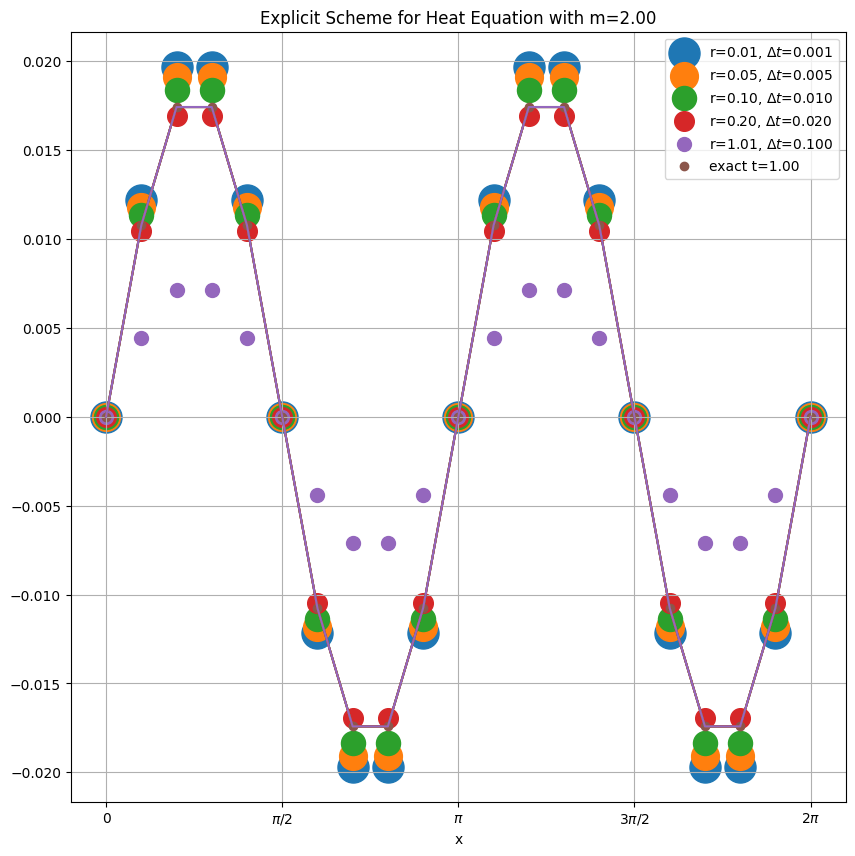

In [150]:
plt.figure(figsize=(10,10))

# for t in range(1):
r = np.array(dt) / dx ** 2
for id in range(len(dt)):
    Ndt = int(T/dt[id])
    # Ndt = 5
    plt.scatter(x_grid, result_1[id][Ndt], label='r=%.2f, $\Delta t$=%.3f'%(r[id], dt[id]), s = (len(dt)-id)*1e2)
# plt.plot(x_grid, u(x_grid, t=T, m=m), label='exact t=%.2f'%T)
    plt.plot(x_grid, u(x_grid, t=Ndt*dt[id], m=m))
plt.scatter(x_grid, u(x_grid, t=Ndt*dt[id], m=m), label='exact t=%.2f'%(Ndt*dt[id]))
plt.legend()
plt.xlabel('x')
plt.xticks(np.linspace(0, 2*np.pi, 5), ['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
plt.title("Explicit Scheme for Heat Equation with m=%.2f"%m)
plt.grid(True)

Note that `m` should be set s.t. B.C. $\sin(2\pi m)=0$ be kept. 0.5 is feasible, try with a surprise. :)

#### 1.2.2 Backward Euler method
Namely implicit form. 
$$

u^{k+1}_i= u^{k}_i + \frac{\Delta t}{\Delta x^2}(u^{k+1}_{i+1}-2u^{k+1}_i+u^{k+1}_{i-1}) ~~where~~ k\in [0, N-1], ~i\in[1,M-1]

$$
Rearrange this equation rendering:
$$
-ru^{k+1}_{i+1} + (1+2r)u^{k+1}_{i}-ru^{k+1}_{i-1} = u^{k}_{i}
$$ where $r =\frac{\Delta t}{\Delta x^2}$
And we get the matrix form:
$$
\begin{pmatrix}
       1+2r      & -r    & 0 & \dots   &0\\
       -r     & 1+2r    & -r & \dots   &0\\
       0         & -r   & 1+2r & \dots & 0\\ 
       \vdots      & \vdots      & \ddots  &\vdots& \vdots\\
       0 & 0 & \dots   & 1+2r & -r\\
       0 & 0 & \dots   & -r & 1+2r\\
\end{pmatrix}
\begin{pmatrix}
u^{k+1}_{1} \\
u^{k+1}_{2}\\
\vdots \\
u^{k+1}_{M-1}
\end{pmatrix}
=
\begin{pmatrix}
u^{k}_{1} \\
u^{k}_{2}\\
\vdots \\
u^{k}_{M-1}
\end{pmatrix}
$$


> [!NOTE] TDMA
> To solve a system in form of
> $$
> \begin{pmatrix}
> b_1      & c_1    & 0 & \dots   &0\\ 
> a_2     & b_2    & c_2 & \dots   &0\\
> 0         & a_3  & b_3 & \dots & 0\\ 
> \vdots      & \vdots      & \ddots  &\vdots& \vdots\\
> 0 & 0 & \dots   & b_{n-1} &c_{n-1}\\
> 0 & 0 & \dots   & a_n & b_n\\
> \end{pmatrix}
> \begin{pmatrix}
> x_1 \\
> x_2\\
> x_3\\
> \vdots \\
> x_n
> \end{pmatrix}
> =
> \begin{pmatrix}
> d_1 \\
> d_2\\
> d_3\\
> \vdots \\
> d_n
> \end{pmatrix}$$
>One can convert the coefficients to:
> $$c_i^\prime =  \begin{cases}
 \frac{c_i}{b_i}  &; i = 1\\
 \frac{c_i}{b_i - a_ic_{i-1}^\prime} & ;i=2,3,\dots,n-1
\end{cases}$$
>And 
>$$
>d_i^\prime =  \begin{cases}
 \frac{d_i}{b_i}  &; i = 1\\
 \frac{d_i-a_id_{i-1}^\prime}{b_i - a_ic_{i-1}^\prime} & ;i=2,3,\dots,n
\end{cases}$$
And solve the original equation in steps:
>  $$\begin{align}
& x_n = d^\prime_n \\ 
& x_i = d^\prime_i - c^\prime_ix_{i+1}~~; i=n-1,n-2,\dots,1.
\end{align}$$

Substituting related coefficients and one renders the FDM solution.


In [112]:
def coef_c(ali, bli, cli):
    # give a_i, b_i, c_i, return c_i^\prime
    assert len(cli) == len(ali) and len(bli) == len(cli)
    res = np.zeros(cli.size-1)
    res[0] = cli[0] / bli[0]
    for i in range(1,len(ali)-1):
        res[i] = cli[i] / (bli[i] - ali[i] * res[i-1])
    return res

def coef_d(ali, bli, dli, clip):
    # give a_i, b_i, c_i^\prime , return d_i^\prime
    # assert len(clip) == len(ali) and len(dli) == len(bli)
    res = np.zeros_like(dli)
    res[0] = dli[0] / bli[0]
    for i in range(1,len(dli)):
        res[i] = (dli[i] - ali[i] * res[i-1]) / (bli[i] - ali[i] * clip[i-1])
    return res

def solve(clip, dlip):
    # give c_i^\prime, d_i^\prime, return x_i
    assert len(clip) == len(dlip) - 1
    res = np.zeros_like(dlip)
    res[-1] = dlip[-1]
    for i in range(len(dlip)-2,-1,-1):
        res[i] = dlip[i] - clip[i] * res[i+1]
    return res

In [113]:
# implicit solver
def u_implicit(u, k, ali, bli, clip):
    res = np.empty_like(u)
    res[0] = BC_x(k*dt)
    res[-1] = BC_x(k*dt)
    dlip = coef_d(ali, bli, u[1:-1], clip)
    res[1:-1] = solve(clip, dlip)
    return res

In [114]:

result_2 = np.zeros(shape=(len(dt), N, M+2))
assert x_grid[1] - x_grid[0] == dx

# u_0 for time 0

for id in range(len(dt)):
    r = dt[id] / dx ** 2
    result_2[id][0] = BC_t(x_grid, m)
    ali = np.ones(M) * (-r)
    cli = np.ones(M) * (-r)
    bli = np.ones(M) * (1+2*r)
    clip = coef_c(ali, bli, cli)
    # main iter
    for t in range(1,N):
        result_2[id][t] = u_implicit(result_2[id][t-1], t, ali, bli, clip)

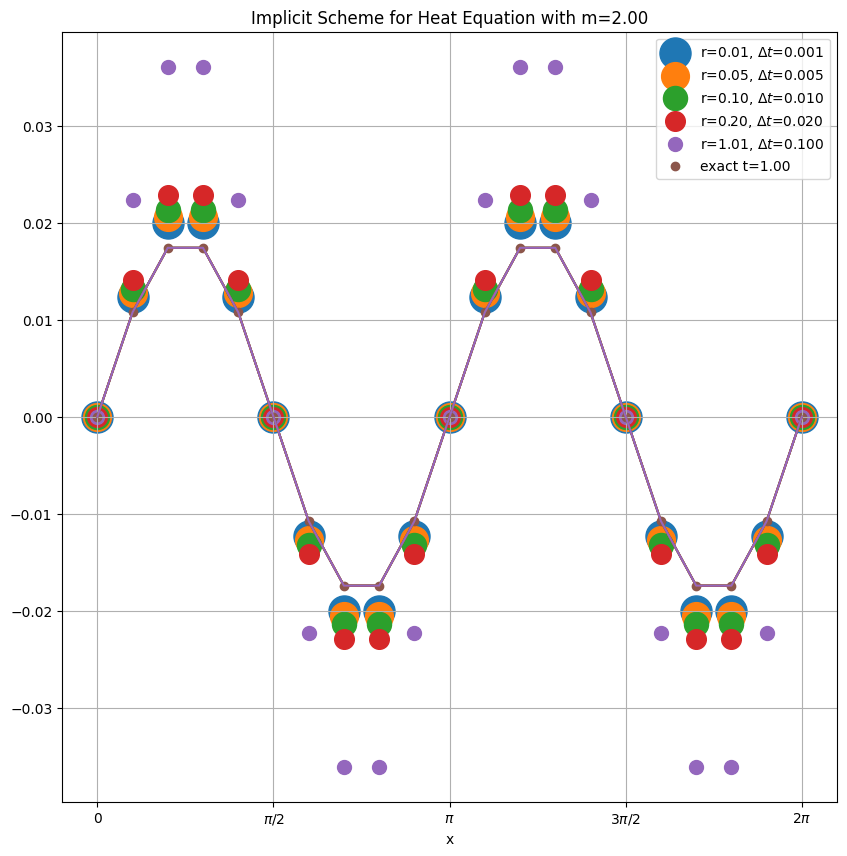

In [115]:
plt.figure(figsize=(10,10))

# for t in range(1):
for id in range(len(dt)):
    Ndt = int(T/dt[id])
    # Ndt = 10
    plt.scatter(x_grid, result_2[id][Ndt], label='r=%.2f, $\Delta t$=%.3f'%(dt[id]/dx**2, dt[id]), s = (len(dt)-id)*1e2)
    # plt.plot(x_grid, u(x_grid, t=T, m=m), label='exact t=%.2f'%T)
    plt.plot(x_grid, u(x_grid, t=Ndt*dt[id], m=m))
plt.scatter(x_grid, u(x_grid, t=Ndt*dt[id], m=m), label='exact t=%.2f'%(Ndt*dt[id]))
plt.legend()
plt.xlabel('x')
plt.xticks(np.linspace(0, 2*np.pi, 5), ['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
plt.title("Implicit Scheme for Heat Equation with m=%.2f"%m)
plt.grid(True)

#### 1.2.3 Crank-Nicolson method
This method is somehow a combination of explicit and implicit form. The discretization expresses:
$$
\frac{u^{k+1}_i-u^{k}_i}{\Delta t} = \frac{1}{2\Delta x^2} ((u^{k+1}_{i+1}-2u^{k+1}_i+u^{k+1}_{i-1})+(u^{k}_{i+1}-2u^{k}_i+u^{k}_{i-1}))
$$
Setting $r =\frac{\Delta t}{2\Delta x^2}$ again we obtain:
$$
-ru^{k+1}_{i+1} + (1+2r)u^{k+1}_{i}-ru^{k+1}_{i-1} = ru^{k}_{i+1} + (1-2r)u^{k}_{i}+ru^{k}_{i-1}
$$
Note that in this form the right coefficients are always updating.

In [116]:
# the updating of right hand
def get_d(u, k, ali, bli, cli):
    res = np.zeros(u.size-2)
    res = ali*u[2:] + bli*u[1:-1] + cli*u[:-2]
    return res

# C-N method
def u_cn(u, k, ali, bli, cli, alir, blir, clir, clip):
    res = np.empty_like(u)
    res[0] = BC_x(k*dt)
    res[-1] = BC_x(k*dt)
    now_d = get_d(u, k-1, alir, blir, clir)
    dlip = coef_d(ali, bli, now_d, clip)
    res[1:-1] = solve(clip, dlip)
    return res

In [117]:
result_3 = np.zeros(shape=(len(dt), N, M+2))
assert x_grid[1] - x_grid[0] == dx

# u_0 for time 0
for id in range(len(dt)):
    result_3[id][0] = BC_t(x_grid, m)
    r = dt[id] / (2*(dx ** 2))
    ali = np.ones(M) * (-r)
    cli = np.ones(M) * (-r)
    bli = np.ones(M) * (1+2*r)
    alir = np.ones(M) * (r)
    clir = np.ones(M) * (r)
    blir = np.ones(M) * (1-2*r)
    clip = coef_c(ali, bli, cli)
    # main iter
    for t in range(1,N):
        result_3[id][t] = u_cn(result_3[id][t-1], t, ali, bli, cli, alir, blir, clir, clip)

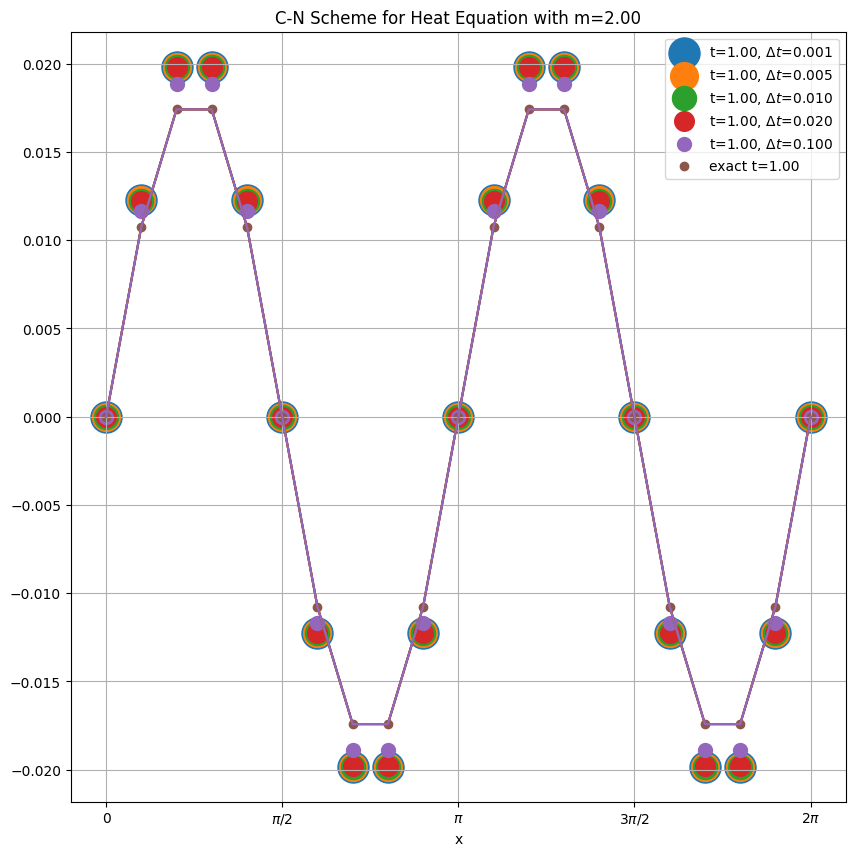

In [118]:
plt.figure(figsize=(10,10))
# for t in range(1):

for id in range(len(dt)):
    Ndt = int(T/dt[id]) 
    # Ndt=10 
    plt.scatter(x_grid, result_3[id][Ndt], label='t=%.2f, $\Delta t$=%.3f'%(T, dt[id]), s = (len(dt)-id)*1e2)
    # plt.plot(x_grid, u(x_grid, t=T, m=m), label='exact t=%.2f'%T)
    plt.plot(x_grid, u(x_grid, t=Ndt*dt[id], m=m))
plt.scatter(x_grid, u(x_grid, t=Ndt*dt[id], m=m), label='exact t=%.2f'%(Ndt*dt[id]))
plt.legend()
plt.xlabel('x')
plt.xticks(np.linspace(0, 2*np.pi, 5), ['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
plt.title("C-N Scheme for Heat Equation with m=%.2f"%m)
plt.grid(True)

### 1.3 Question (c)

accuracy analysis on log-log plot:

In [119]:
result_1[j][i]

array([ 0.00000000e+00,  2.02038394e-04,  3.26904989e-04,  3.26904989e-04,
        2.02038394e-04, -9.07288011e-18, -2.02038394e-04, -3.26904989e-04,
       -3.26904989e-04, -2.02038394e-04, -4.56078200e-18,  2.02038394e-04,
        3.26904989e-04,  3.26904989e-04,  2.02038394e-04,  6.48964453e-18,
       -2.02038394e-04, -3.26904989e-04, -3.26904989e-04, -2.02038394e-04,
        0.00000000e+00])

In [130]:
loss

array([[0.00000000e+00, 7.53925453e-03, 2.94147027e-04, 8.61791114e-06,
        2.24711477e-07],
       [0.00000000e+00, 5.57757791e-03, 2.14151454e-04, 6.17110676e-06,
        1.58182092e-07],
       [0.00000000e+00, 3.15225821e-03, 1.18613517e-04, 3.34818486e-06,
        8.40298650e-08],
       [0.00000000e+00, 1.60547638e-03, 5.79955569e-05, 1.57135888e-06,
        3.78470566e-08],
       [0.00000000e+00, 3.42317953e-02, 8.83393713e-04, 5.17997109e-03,
        3.01837515e+02]])

/tmp/ipykernel_1940824/146873556.py:20: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(Tmax), np.log(loss[j]),label='$\Delta t=$%.3f'%dt[j])
/tmp/ipykernel_1940824/146873556.py:21: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.arange(Tmax), np.log(loss[j]),s=0.1)


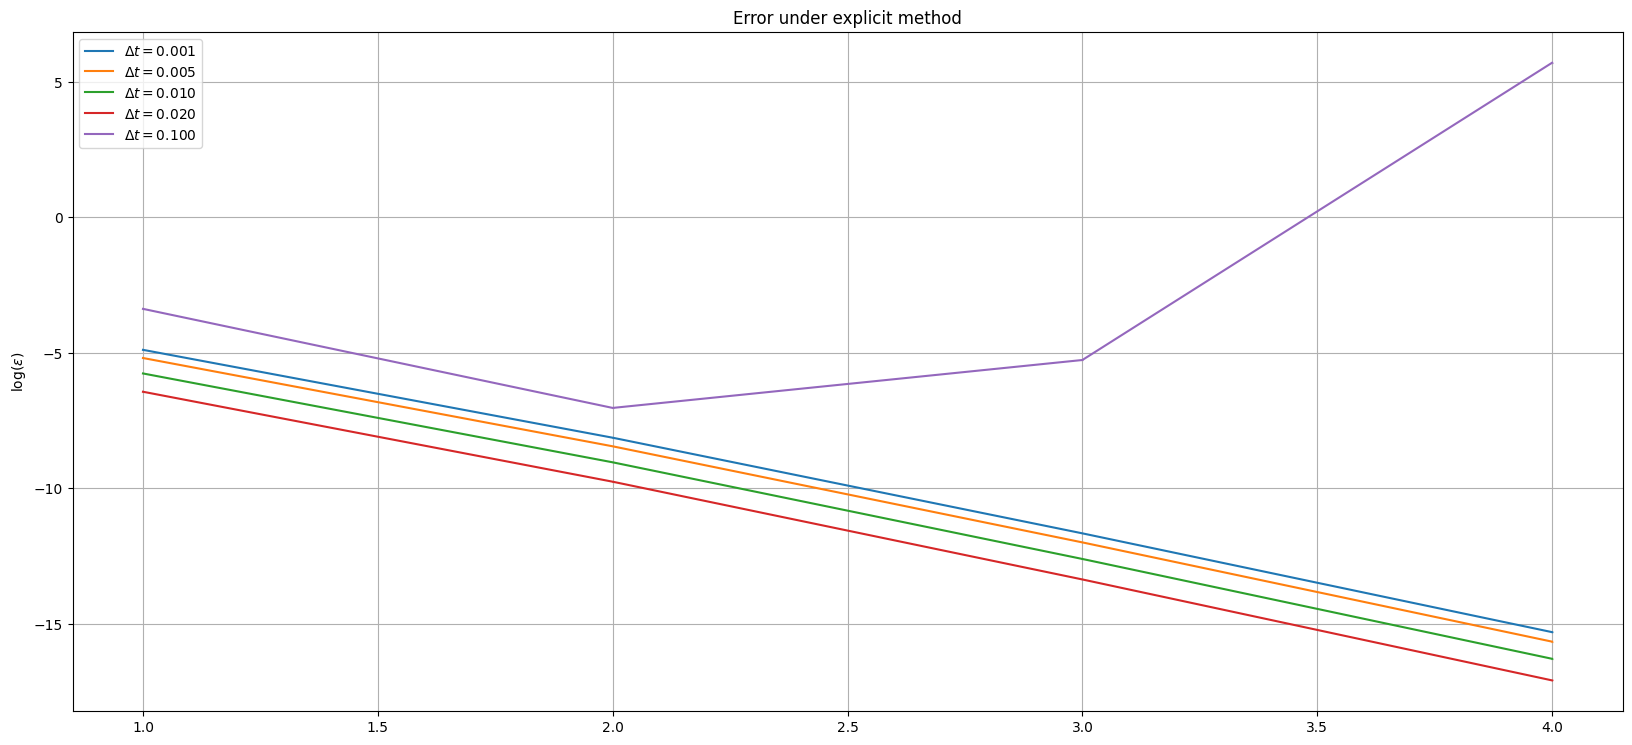

In [131]:
# cannot use log-log accuracy plot
# Monte Carlo choosing x to calculate error, repeat 100 times
from IPython import display
from matplotlib.animation import FuncAnimation
plt.figure(figsize=(20,30))
k = 1
Nt = 10000
plt.subplot(311)
# T = 2
Tmax = 5
loss = np.zeros((len(dt), Tmax))
for it in range(Tmax):
    for j in range(len(dt)):
        ndt = int(it/dt[j])
        # for i in range(N):
        #     loss[j, i] = np.linalg.norm(u(x_grid, t=i*dt[j], m=m) - result_1[j][i])
        loss[j, it] = np.linalg.norm(u(x_grid, t=ndt*dt[j], m=m) - result_1[j][ndt])
        # print(Nt, len(np.arange(0,T, dt[j])), len(loss[j]))
for j in range(len(dt)):
    plt.plot(np.arange(Tmax), np.log(loss[j]),label='$\Delta t=$%.3f'%dt[j])
    plt.scatter(np.arange(Tmax), np.log(loss[j]),s=0.1)

# plt.xlabel("$t$ steps")
plt.ylabel("$\log(\epsilon)$")
plt.title("Error under explicit method")
# plt.ylim(-10, 0)
plt.legend()
plt.grid(True)
plt.show()

Here we come to the conclusion:
- In Forward Euler method, when $\frac{\Delta t}{\Delta x^2}$ is larger than 1/2 ($\Delta t = 0.1$ situation), the error surges as the grid size becomes adequatly large. In other two methods, they show unconditional stability.
- For accuracy, the accuracy first climbs up and then decreases as time steps get larger, in all stable situations. 
- While time grid size becomes smaller, it costs more steps to reach the same error level. As is shown in previous sections, in smaller time-grid size, Forward-Euler method and C-N method show worse accuracy in their stable solutions, while backward one shows better accuracy. This is quite out of expectation.